In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Load dataset

In [2]:
fake_data=pd.read_csv(r"C:\Users\Hp\Documents\Fake News Detection\LIAR plus dataset\Fake.csv")
real_data=pd.read_csv(r"C:\Users\Hp\Documents\Fake News Detection\LIAR plus dataset\True.csv")

Data Analysis

In [3]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
real_data.shape

(21417, 4)

In [5]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
real_data.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


Now,For Fake only

In [7]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
fake_data.shape

(23481, 4)

In [9]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
fake_data.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


Checking Missing Values

In [11]:
real_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
fake_data['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [15]:
real_data['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

Create target column and concat two dataframes into one

In [16]:
real_data['target']=1
fake_data['target']=0

df=pd.concat([real_data,fake_data],axis=0)
df.head(40000)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
18578,CHOKING ON HER LIES? HILLARY CLINTON Has Cough...,Hillary Clinton was delivering the commencemen...,left-news,"May 26, 2017",0
18579,CNN’S DON LEMON Tries to Blame Trump…Cuts Off ...,Don Lemon tries to blame Donald Trump for the ...,left-news,"May 26, 2017",0
18580,CONSEQUENCES OF LIBERAL TOLERANCE: He Had An I...,Terrified concert goers fled an Ariana Grande ...,left-news,"May 25, 2017",0
18581,LIST OF 3 COMPANIES WHO Caved To Leftists…PULL...,"Companies including Cars.com, Peloton, and Lee...",left-news,"May 25, 2017",0


Data Shape

In [17]:
df.shape

(44898, 5)

Check Duplicates


In [18]:

df.duplicated().sum()

np.int64(209)

Drop Duplicate Rows

In [19]:
df = df.drop_duplicates()

In [20]:
df.duplicated().sum()

np.int64(0)


Drop Columns

In [21]:
df = df.drop(['title', 'subject','date'],axis=1)
df.isnull().sum()

text      0
target    0
dtype: int64

Shuffling df

In [22]:
df=df.sample(frac = 1)
df.head(10)

,text,target
14077,Is a third place finish for Cruz a game change...,0
9309,SINGAPORE (Reuters) - The United States expect...,1
11726,WARSAW (Reuters) - The European Commission s d...,1
19414,,0
19266,,0
19122,BRUSSELS (Reuters) - European Commission Presi...,1
17242,The Fundamental Transformation of America is...,0
1726,Late Show host Stephen Colbert is no fan of Do...,0
248,WASHINGTON (Reuters) - U.S. Democratic Senator...,1
10326,WASHINGTON (Reuters) - Democratic presidential...,1


In [23]:
df.reset_index(inplace = True)
df.drop(["index"],axis=1,inplace=True)
df.head()

,text,target
0,Is a third place finish for Cruz a game change...,0
1,SINGAPORE (Reuters) - The United States expect...,1
2,WARSAW (Reuters) - The European Commission s d...,1
3,,0
4,,0


In [24]:
df['text'][3778]

'HANOI (Reuters) - Prosecutors in Vietnam on Thursday said they were seeking the death sentence in an embezzlement case against a former chairman of state energy firm PetroVietnam, as the communist country steps up one of its biggest corruption crackdowns. Some high-ranking political officials have been punished as investigations widen into PetroVietnam and the banking sector, with dozens of banking and energy officials facing trial on charges such as embezzlement, mismanagement and abuse of power. In a statement, the Supreme People s Procuracy of Vietnam said it had sought a death sentence for the former chairman, Nguyen Xuan Son, on charges that include wrongdoing with serious economic consequences and abuse of power to usurp assets. It urged  an overall penalty of death , listing punishments such as a jail term of 16 to 18 years for flouting state rules on economic management and life imprisonment for abuse of power, before seeking the  death sentence for embezzlement . In 2009, Pet

In [25]:
df['text'][93]

'Why is there so much secrecy when it comes to the mainstream media and the alleged lesbian relationship between Hillary and her aide of 20 years, Huma Abedin? ABC News admits that the allegations against Ted Cruz have not been confirmed by them. But what the hell, why not do a story on it anyhow and see if they can make the sleazy image of a cheating Ted Cruz stick ABC News   At a news conference while campaigning in Wisconsin today, Ted Cruz denied a recently released National Enquirer report that claims  political operatives  are looking into rumors that Cruz had multiple marital infidelities.Cruz blamed the report on Donald Trump and his  henchmen  and gave Trump a new nickname of  Sleazy Donald. Let me be clear this National Enquirer story is garbage,  Cruz said today.  It is complete and utter lies. It is a tabloid smear and it is a smear that has come from Donald Trump and his henchmen. Cruz has been in a war of words with Trump over tweets Trump had been sending. Trump tweeted 

In [26]:
df['text'][39000]

'WASHINGTON (Reuters) - Republican Senator Bob Corker said on Thursday there was no way the healthcare bill being considered by the House of Representatives would receive a quick up-or-down vote in the U.S. Senate, predicting it would take “30 days or so.” “My guess is we’re going to spend at least a month looking at the issue, making sure that it passes the test of time,” Corker said in an interview on MSNBC. “I know it’s not going to be immediate,” he added. “I’m going to guess 30 days or so.”  '

Text Preprocessing

Lowercase

In [27]:
df['text']=df['text'].str.lower()
df.head(10)

,text,target
0,is a third place finish for cruz a game change...,0
1,singapore (reuters) - the united states expect...,1
2,warsaw (reuters) - the european commission s d...,1
3,,0
4,,0
5,brussels (reuters) - european commission presi...,1
6,the fundamental transformation of america is...,0
7,late show host stephen colbert is no fan of do...,0
8,washington (reuters) - u.s. democratic senator...,1
9,washington (reuters) - democratic presidential...,1


Remove Punctuation

In [28]:
import string

# Remove punctuation using lambda function
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Verify the changes
print(df.head())

                                                text  target
0  is a third place finish for cruz a game change...       0
1  singapore reuters  the united states expects t...       1
2  warsaw reuters  the european commission s deci...       1
3                                                          0
4                                                          0





Remove Stopwords

In [29]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'text' column using a lambda function
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Verify the changes
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  target
0  third place finish cruz game changerif cruz co...       0
1  singapore reuters united states expects mainta...       1
2  warsaw reuters european commission decision la...       1
3                                                          0
4                                                          0


Tokenization

In [30]:
from nltk.tokenize import word_tokenize
# Apply word tokenization using a lambda function
df['text'] = df['text'].apply(lambda x: word_tokenize(x))

# Verify the changes
print(df.head())

                                                text  target
0  [third, place, finish, cruz, game, changerif, ...       0
1  [singapore, reuters, united, states, expects, ...       1
2  [warsaw, reuters, european, commission, decisi...       1
3                                                 []       0
4                                                 []       0


Stemmer

In [31]:
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Apply stemming using a lambda function
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Verify the changes
print(df.head())


                                                text  target
0  [third, place, finish, cruz, game, changerif, ...       0
1  [singapor, reuter, unit, state, expect, mainta...       1
2  [warsaw, reuter, european, commiss, decis, lau...       1
3                                                 []       0
4                                                 []       0


Word Cloud

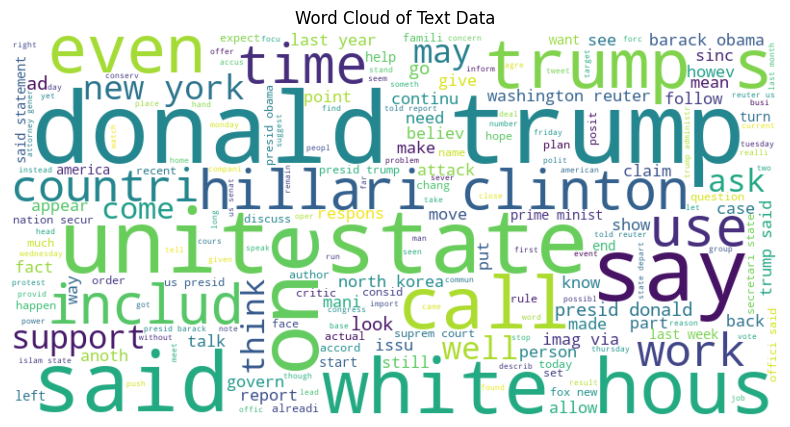

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = ' '.join([' '.join(tokens) for tokens in df['text']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Text Data')
plt.show()

In [33]:
# Save df to a CSV file
df.to_csv('News_Cleaned_data.csv', index=False)

Convert Text to Vector